# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
#import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

For a value x of 0.01 0.01 is the optimal insurance with utility of -1.0020040080160322
For a value x of 0.011783567134268537 0.011783567134268537 is the optimal insurance with utility of -1.0023622806453687
For a value x of 0.013567134268537074 0.013567134268537074 is the optimal insurance with utility of -1.0027208095714626
For a value x of 0.015350701402805611 0.015350701402805611 is the optimal insurance with utility of -1.0030795950694316
For a value x of 0.01713426853707415 0.01713426853707415 is the optimal insurance with utility of -1.0034386374147881
For a value x of 0.018917835671342684 0.018917835671342684 is the optimal insurance with utility of -1.0037979368834389
For a value x of 0.020701402805611224 0.020701402805611224 is the optimal insurance with utility of -1.0041574937516853
For a value x of 0.022484969939879758 0.022484969939879758 is the optimal insurance with utility of -1.0045173082962262
For a value x of 0.0242685370741483 0.0242685370741483 is the optimal insu

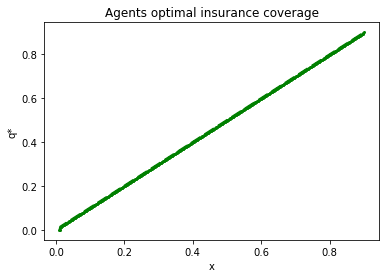

In [3]:



# iii) We start with a fixed x of 0.5 and create a grit containing the range
N=500
q = np.linspace(0.01,0.5,N)
x = 0.5

#applying the parametrization
y = 1
p = 0.2
zeta=-2

shape_tuple = (N)
u_values = np.empty(shape_tuple)


#defining the utility function
def u_func(p,y,x,q,zeta):
    return p*((y-x+q-p*q)**(1+zeta))/(1+zeta)+(1-p)*((y-p*q)**(1+zeta))/(1+zeta)
#print(p*((y-x+q-p*q)**(1+zeta))/(1+zeta)+(1-p)*((y-p*q)**(1+zeta))/(1+zeta))

#creating the grid of x a range between 0.01 and 0.09
x = np.linspace(0.01,0.9,N)

#Creating a loop that returns the agents' optimal insurance coverage
for ind, vx in enumerate(x):
    q_save=np.empty(N)
    q_best = 0.01
    u_best = u_func(p,y,vx,0.01,zeta)
    q_value=np.linspace(0.01,vx,N)
    for count, value in enumerate(q_value):
        u_values[count]=u_func(p,y,vx,value,zeta)
        if u_values[count]>=u_best:
            u_best=u_values[count]
            q_best=value

    print(f'For a value x of {vx} {q_best} is the optimal insurance with utility of {u_best}')       
    q_save[ind]=q_best
    #print(u_values)
        

# Plotting the x's and q*s
import matplotlib.pyplot as plt 
plt.plot(x, q_save, color = "g", marker = "o", linestyle= "--", linewidth = 3,
        markersize = 2)
plt.title("Agents optimal insurance coverage")
plt.xlabel("x")
plt.ylabel("q*")
plt.show()
# Outer loop over different values of x

#print(q_save)

#for i in range(N):
    

#for i in np.nditer(q_):
   # print(i)

    # Start from guess of q


    # loop over possibilities
#for i in range(N):
    #q_values=q1=i
    #u_values[i] = u_func(p,y,x,q1,zeta)
    
    #if u_values[i] >= u_best:
        #q_best = q_values[i]
       # u_best = u_values[i]



#print(u_best)





# iii)


# Question 2

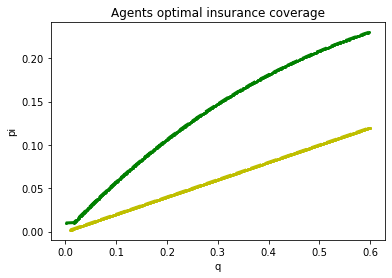

-1.282051282051282


In [4]:
#Firstly, we generate the parameterization

N=500
x2 = 0.6
p=0.2
zeta=-2
y=1

#Defining functions for loop
def u_func2(p,y,x2,q,zeta,pi):
    return p*((y-x2+q-pi)**(1+zeta))/(1+zeta)+(1-p)*((y-pi)**(1+zeta))/(1+zeta)

def u_noin(p,y,x2,zeta):
    return p*((y-x2)**(1+zeta))/(1+zeta)+(1-p)*((y)**(1+zeta))/(1+zeta)

#creating loop
shape_tuple = (N)
u_ins = np.empty(shape_tuple)
q_saveny=np.empty(shape_tuple)
u_equal=u_func2(p,y,x2,0.001,zeta,pi=0.2)
q_equal=0.001
q_new=np.linspace(0.01,x2,N)
pi=np.linspace(0.01,0.23,N)
for pik, fisse in enumerate(pi):
    for index, val in enumerate(q_new):
        u_ins[index]=u_func2(p,y,x2,val,zeta,fisse)
        if abs(u_ins[index]-u_noin(p,y,x2,zeta))<=0.0005:
            u_equal=u_ins[index]
            q_equal=val
    #print(q_equal, fisse)
    q_saveny[pik]=q_equal
    
# Now I make a function of minimum acceptable premiums for company

pi_comp=np.empty(shape_tuple)
q_comp=np.linspace(0.01,x2,N)
for w,e in enumerate(q_comp):
    pi_comp[w]=e*0.2

    
#Plotting acceptable premiums with the pi(q,p) function
import matplotlib.pyplot as plt 
plt.plot(q_saveny, pi, color = "g", marker = "o", linestyle= "--", linewidth = 3,
        markersize = 2)
plt.plot(q_comp, pi_comp, color = "y", marker = "o", linestyle= "--", linewidth = 3,
        markersize = 2)
plt.title("Agents optimal insurance coverage")
plt.xlabel("q")
plt.ylabel("pi")
plt.show()

print(u_func2(p,y,x2,q=0.6,zeta=zeta,pi=0.22))
            

In [5]:

#******* Question 3 *********

#Importing distribution expressions

from scipy.stats import norm # normal distribution
from scipy.stats import beta # beta distribution

#Generating parameterization
y=1
zeta=-2
pi=0.2
gamma=0.9

#Defining functions
def g(x,y,zeta,gamma,pi):
    return (y-(1-gamma)*x-pi)**(1+zeta)/(1+zeta)

def MC(N,g,F):
    X = F.rvs(size=N) # rvs = draw N random values from F
    return np.mean(g(X,y,zeta,gamma,pi)) # apply g to X


N = 10000
#mu = 0.1
#sigma = 0.5

#Generating the beta distribution with alpha=2 and beta=7
F = beta(a=2,b=7)

mc_integral = MC(N,g,F)
print('E[g(x)] =', mc_integral)

#Now for different values

y=1
zeta=-2
pi1=0.1
gamma1=0.45
def g1(x,y,zeta,gamma1,pi1):
    return (y-(1-gamma1)*x-pi1)**(1+zeta)/(1+zeta)

def MC1(N,g1,F):
    X = F.rvs(size=N) # rvs = draw N random values from F
    return np.mean(g1(X,y,zeta,gamma1,pi1)) # apply g to X


N = 10000
#mu = 0.1
#sigma = 0.5
F = beta(a=2,b=7)

#Creatinng integral function
mc1_integral = MC1(N,g1,F)
print('E[g(x)] =', mc1_integral)


E[g(x)] = -1.2861251395654605
E[g(x)] = -1.2981265548444636


In [7]:
#*****  Question 4 ********

# First we calculate the expected value if there is no insurance
y=1
zeta=-2
def g_no(x,y,zeta,):
    return (y-x)**(1+zeta)/(1+zeta)

def MC_no(N,g_no,F):
    X = F.rvs(size=N) # rvs = draw N random values from F
    return np.mean(g_no(X,y,zeta)) # apply g to X


N = 10000
F = beta(a=2,b=7)
mcno_integral = MC_no(N,g_no,F)
print('E[g(x)] =', mcno_integral)


# Now we make a loop for the maximum premium they accept:


def g_ins(x,y,zeta,gamma,pi):
    return (y-(1-gamma)*x-pi)**(1+zeta)/(1+zeta)

pi_max=np.linspace(0.01,1,50)
pi_new=0.02
util_f=0.002
for i, k in enumerate(pi_max):

    def MC_ins(N,g_ins,F):
        gamma=0.95
        X = F.rvs(size=N) # rvs = draw N random values from F
        return np.mean(g_ins(X,y,zeta,gamma,k)) # apply g to X
    val=MC_ins(N,g_ins,F)
    if abs(val-mcno_integral)<=0.05:
        pi_new=k
print(pi_new)















E[g(x)] = -1.33431605603795
0.2524489795918367


<class 'numpy.ndarray'>


NameError: name 'u_func' is not defined

# Question 3

Explain your code and procedure

ADD CONCISE CONLUSION.